### This jupyter notebook will anbalyze the simulations of for AIMD containing water and AIMD with an excess proton

In [4]:
import mdtraj as mdt
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
import pandas as pd

import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf

In [5]:
#First, we will load the energy files for water and the extra proton 

energy_water = np.loadtxt('/home/hv454/comp-lab-class-2023/Week12/Runs/Water/water_aimd_1ns_every0.5fs-1.ener')
energy_proton = np.loadtxt('/home/hv454/comp-lab-class-2023/Week12/Runs/Proton/proton_aimd_1ns_every0.5fs-1.ener')

In [6]:
energy_water

array([[ 0.00000000e+00,  0.00000000e+00,  2.73612846e-01, ...,
        -1.10262945e+03, -1.10235584e+03,  0.00000000e+00],
       [ 1.00000000e+00,  5.00000000e-01,  2.79633819e-01, ...,
        -1.10263473e+03, -1.10235603e+03,  4.45646037e+01],
       [ 2.00000000e+00,  1.00000000e+00,  2.78176228e-01, ...,
        -1.10264369e+03, -1.10235629e+03,  7.29099310e+00],
       ...,
       [ 1.99800000e+03,  9.99000000e+02,  2.77609194e-01, ...,
        -1.10270353e+03, -1.10235541e+03,  7.17815068e+00],
       [ 1.99900000e+03,  9.99500000e+02,  2.66621162e-01, ...,
        -1.10270660e+03, -1.10235545e+03,  7.27478124e+00],
       [ 2.00000000e+03,  1.00000000e+03,  2.61786048e-01, ...,
        -1.10271200e+03, -1.10235557e+03,  1.04026927e+01]])

In [7]:
energy_proton

array([[ 0.00000000e+00,  0.00000000e+00,  2.75037913e-01, ...,
        -1.11830900e+03, -1.11803396e+03,  0.00000000e+00],
       [ 1.00000000e+00,  5.00000000e-01,  2.81771638e-01, ...,
        -1.11831669e+03, -1.11803410e+03,  5.66456516e+01],
       [ 2.00000000e+00,  1.00000000e+00,  2.75845042e-01, ...,
        -1.11832880e+03, -1.11803435e+03,  1.21525980e+01],
       ...,
       [ 1.99800000e+03,  9.99000000e+02,  2.94736040e-01, ...,
        -1.11860360e+03, -1.11803606e+03,  8.17097154e+00],
       [ 1.99900000e+03,  9.99500000e+02,  2.90495903e-01, ...,
        -1.11860233e+03, -1.11803590e+03,  8.15932539e+00],
       [ 2.00000000e+03,  1.00000000e+03,  2.76435389e-01, ...,
        -1.11860129e+03, -1.11803575e+03,  1.06558541e+01]])

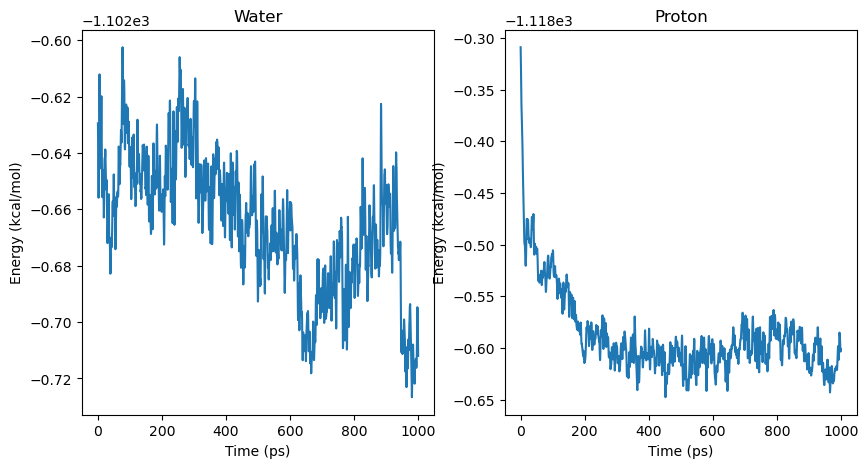

In [8]:
#First, we will plot the energy vs time of water and the proton as subplots

fig, (ax1, ax2) = mplt.subplots(1, 2, figsize=(10,5))

ax1.plot(energy_water[:,1], energy_water[:,4])
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Energy (kcal/mol)')
ax1.set_title('Water')

ax2.plot(energy_proton[:,1], energy_proton[:,4])
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Energy (kcal/mol)')
ax2.set_title('Proton')

mplt.show()

In [9]:
#Now, we will use MD Analysis to calculate the g(r) of water and the extra proton condition

u_water = mda.Universe('/home/hv454/comp-lab-class-2023/Week12/Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz')
u_proton = mda.Universe('/home/hv454/comp-lab-class-2023/Week12/Runs/Proton/proton_aimd_1ns_every0.5fs-pos-1.xyz')

#Now, we will set box dimensions

dim = (12.42, 12.42, 12.42, 90, 90, 90)
u_water.dimensions = dim
u_proton.dimensions = dim

#Next, we will calculate the g(r) of the water and the proton
g_water = rdf.InterRDF(u_water.atoms, u_water.atoms, nbins=100, range=(0.0, 10.0))
g_proton = rdf.InterRDF(u_proton.atoms, u_proton.atoms, nbins=100, range=(0.0, 10.0))

g_water.run()
g_proton.run()


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


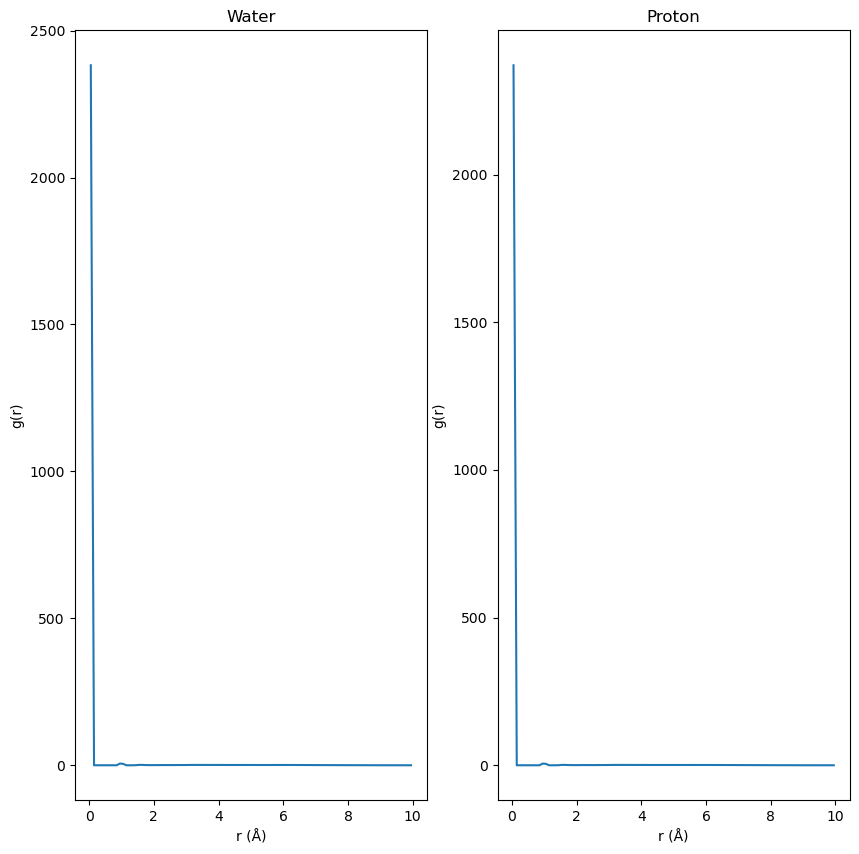

In [12]:
#Finally, we will plot g(r) of water and proton as subplots

fig, (ax1, ax2) = mplt.subplots(1, 2, figsize=(10, 10))
ax1.plot(g_water.bins, g_water.rdf)
ax1.set_xlabel('r (Å)')
ax1.set_ylabel('g(r)')
ax1.set_title('Water')
ax2.plot(g_proton.bins, g_proton.rdf)
ax2.set_xlabel('r (Å)')
ax2.set_ylabel('g(r)')
ax2.set_title('Proton')
mplt.show()